In [15]:
import pandas as pd
import numpy as np

In [17]:
medical_data=pd.read_csv(r"C:\Users\MUNYUA CHARLES\Downloads\medical (1).csv")

In [19]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'


In [29]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


"age","chidren","bmi"(body mass index) and "charges" are numerical whereas "sex","smoker" and region are strings (Categories)

In [38]:
medical_data.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Non of the columns contain any missing value.

### Statistical summary 

In [42]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


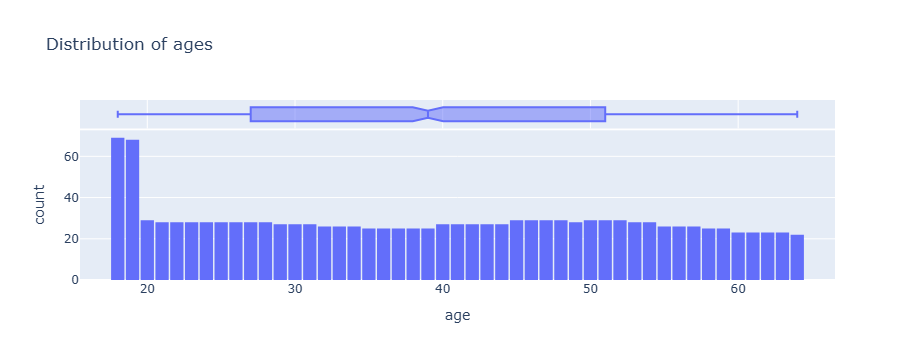

In [73]:
#age distribution 
fig=px.histogram(medical_data,
                x='age',
                marginal='box',
                nbins =47,
                title='Distribution of ages',)
fig.update_layout(bargap=0.1)
fig.show()


The distribution of ages in the dataset is uniform, with 20-30 customers at every age ,expect for the ages 18 and 19 which seems to have over twice as many customers as the other ages.

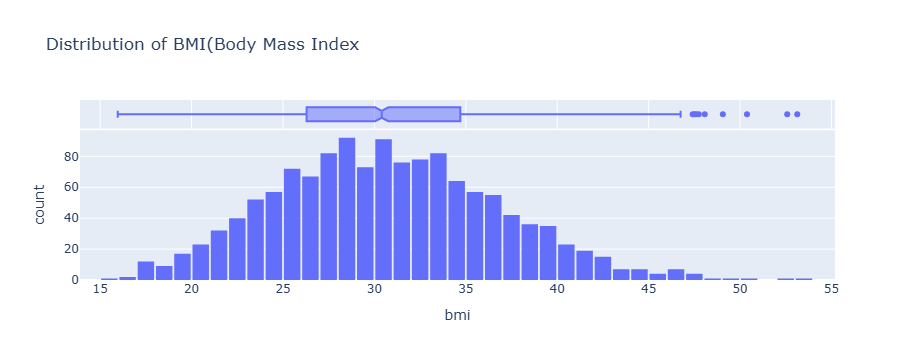

In [71]:
#Body Mass Index Distribution
fig=px.histogram(medical_data,
                x='bmi',
                marginal='box',
                nbins =47,
                title='Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

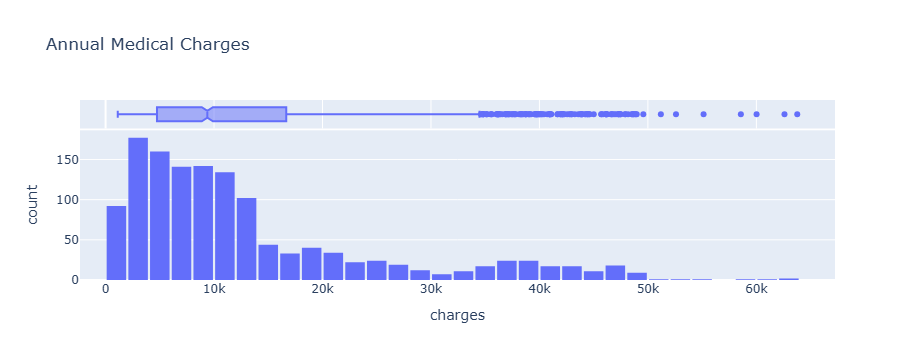

In [79]:
# Distribution of Charges 
#This is the column we are trying to predict 
fig=px.histogram(medical_data,
                x='charges',
                marginal='box',
                nbins =47,
                title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

From the Annual Medical Charges the following insights can be made 
- For most customers, the annual medical charges is under $ 10K. Only a small fraction of customers have higher medical expenses possibly due to accidents, major illinesses and genetic diseases.

In [84]:
# Smokers Distribution 
medical_data.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

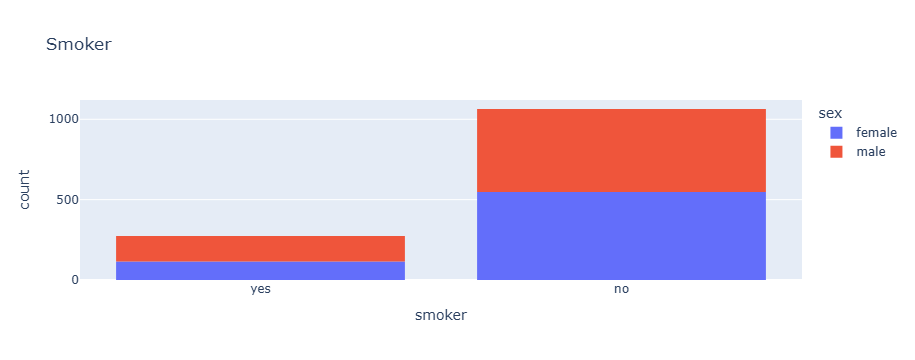

In [88]:
px.histogram(medical_data,
             x='smoker',
             color='sex',
             title='Smoker'
    
)

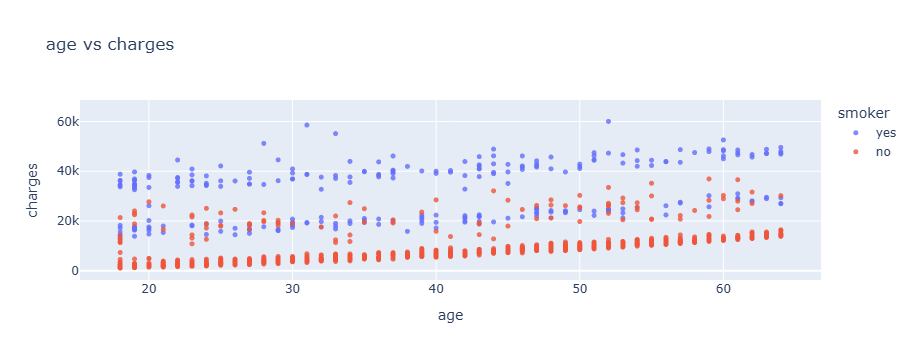

In [99]:
fig=px.scatter(medical_data,
              x='age',
              y='charges',
              color ='smoker',
              opacity=0.8,
              hover_data=['sex'],
              title='age vs charges')
fig.update_traces(marker_size=5)
fig.show()
              

The following insights can be made from the chart above.

- The general trend seems that medical charges increse with age.
 Three diffrent clusters are formed from this two groups of smokres and non smokers.

  1. The first and the largest cluster consist of healthy Non-smokers who have relatively low medical charges as compared to smokers.
  2. The second cluster contains a mix od smokers and non smokers.
  3. The final cluster contains exclusively of smokers with mojor medical issues that  are possibly related to or worsened by smoking.
  

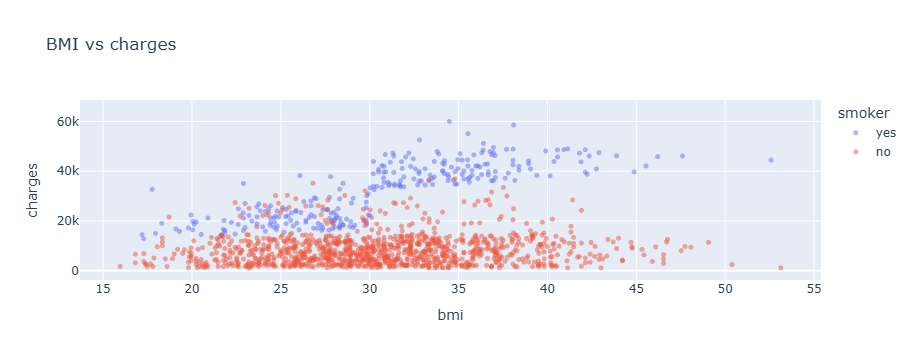

In [108]:
#bmi and charges
fig=px.scatter(medical_data,
              x='bmi',
              y='charges',
              color ='smoker',
              opacity=0.5,
              hover_data=['sex'],
              title='BMI vs charges')
fig.update_traces(marker_size=5)
fig.show()
              

- it seems for non-smokers an increse in BMI doesn't seem to be related to an icrese in medical charges.
- Medical charges for smokers with BMI above 30 is higher.

### Correlation 

In [116]:
medical_data.charges.corr(medical_data.bmi)

0.19834096883362887

In [118]:
medical_data.charges.corr(medical_data.age)

0.2990081933306477

Correlation for categorical columns we must first convert them to numerical columns.

In [123]:
smoker_values={'no':0,'yes':1}
smoker_numerical = medical_data.smoker.map(smoker_values)
medical_data.charges.corr(smoker_numerical)

0.7872514304984773

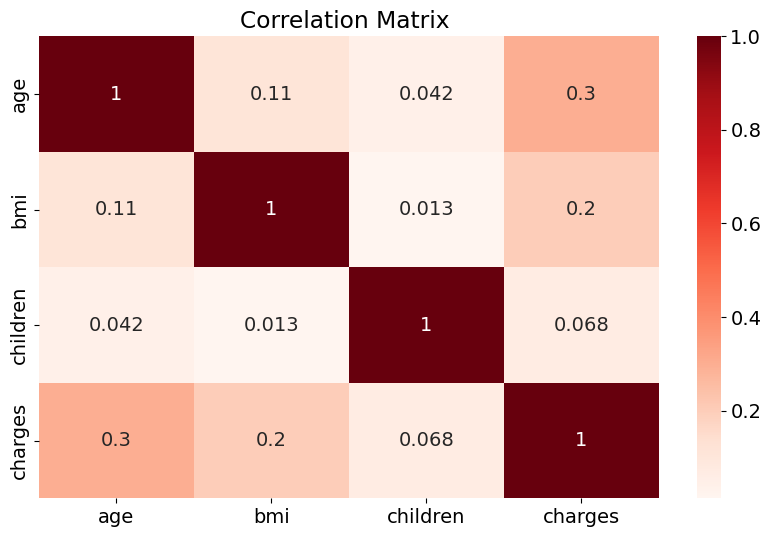

In [133]:
#Correlation Matrix
numeric_data = medical_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(),
           cmap='Reds',
           annot=True)
plt.title('Correlation Matrix ')
plt.show()


smoker and age columns have a strong correlation with charges.

In [136]:
non_smokers_data=medical_data[medical_data.smoker=='no']

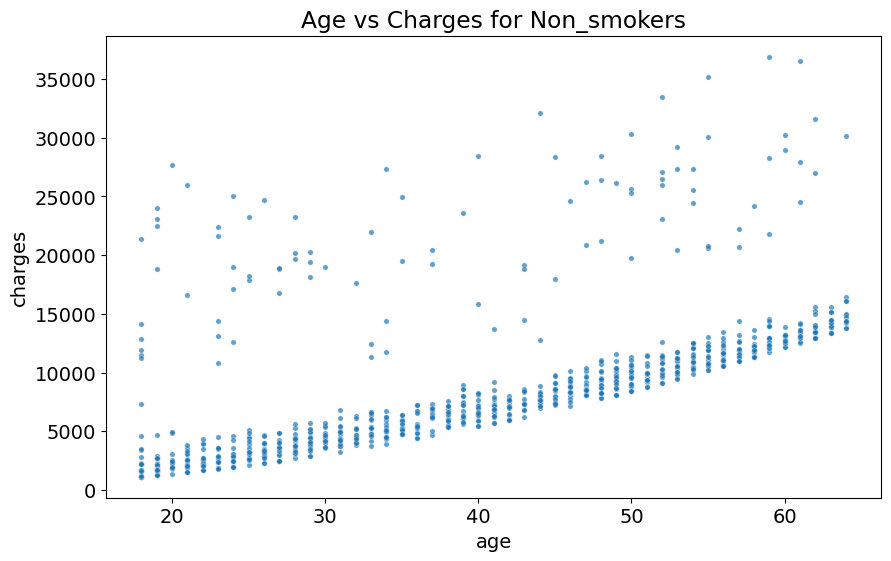

In [144]:
# age and chargesd relationship
sns.scatterplot(data=non_smokers_data,
               x='age',
               y='charges',
               alpha=0.7,
               s=15);
plt.title('Age vs Charges for Non_smokers')
plt.show()

In [146]:
# creating a function to estimate the charges according to the age 
def estimated_charges (w,age,b):
    return w * age + b
    

In [148]:
w=50
b=100
ages =non_smokers_data.age
estimate_charges=estimated_charges(w,ages,b)

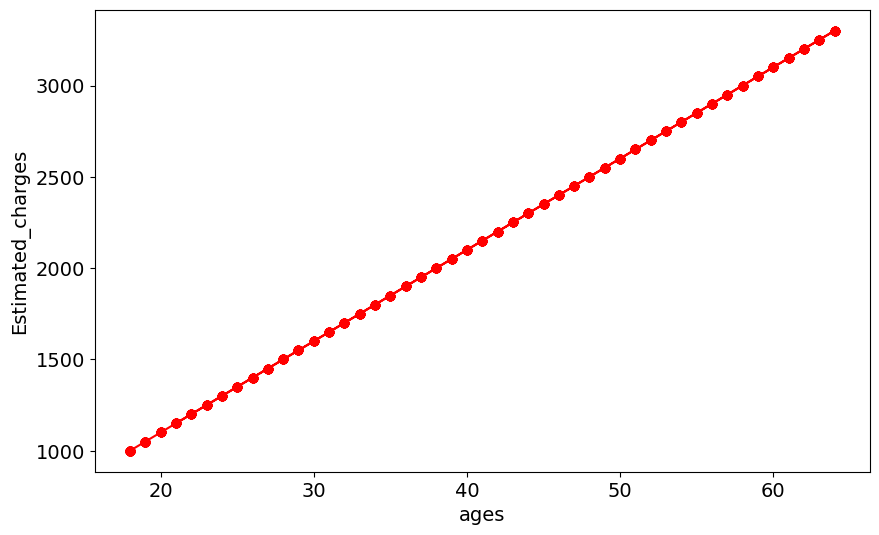

In [150]:
#plotting the estimates charges vs age graph
plt.plot(ages,estimate_charges,"r-o")
plt.xlabel("ages")
plt.ylabel("Estimated_charges")
plt.show()


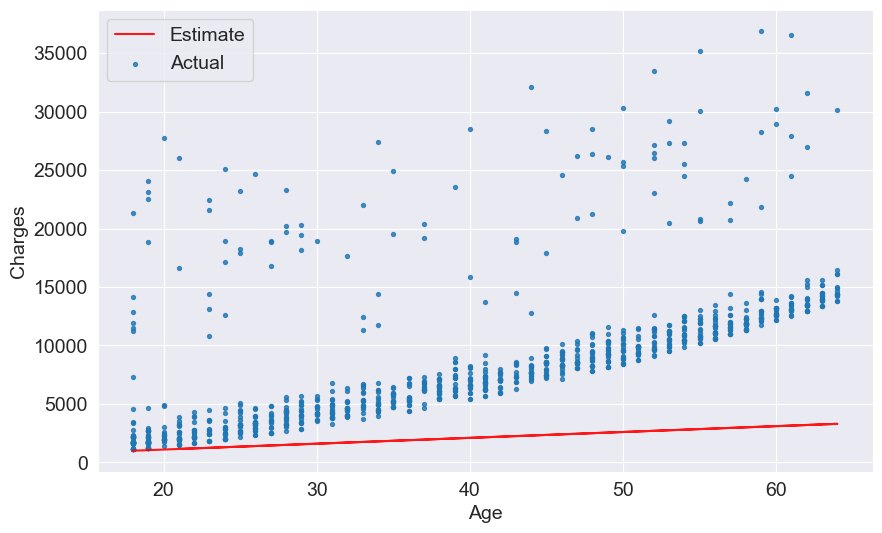

In [180]:
# Now mapping this extimate data to the acual data to see if the model fits the data 
target = non_smokers_data.charges
sns.set_style('darkgrid')
#target refers to as the charges of the non smoker data
plt.plot(ages, estimate_charges, 'r', alpha=0.9)
plt.scatter(ages, non_smokers_data.charges, s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

The estimates are quite poor and the line does not fit the data.


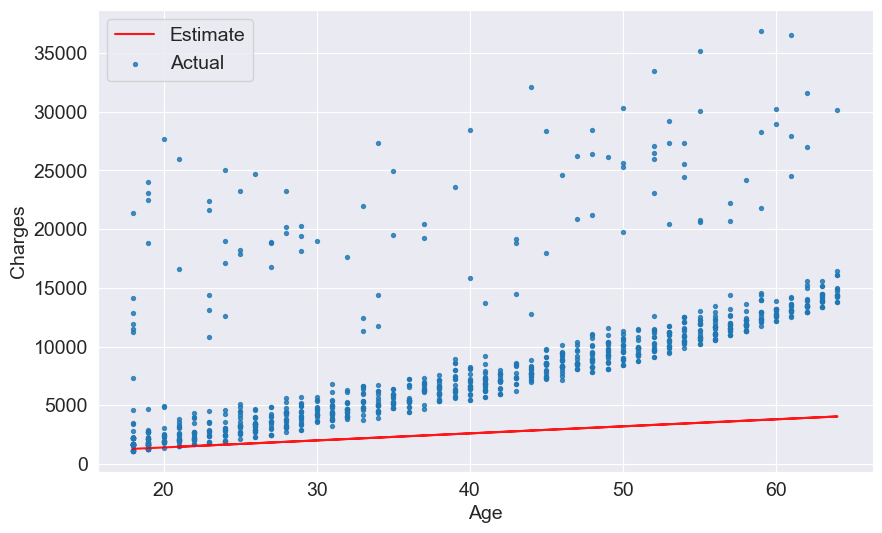

In [200]:
# Function to imput the age and the charges and then visualize them
def try_parameters (w,b):
    ages =non_smokers_data.age
    target=non_smokers_data.charges

    estimate_charges =estimated_charges(ages,w,b)

    plt.plot(ages, estimate_charges, 'r', alpha=0.9)
    plt.scatter(ages, non_smokers_data.charges, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()
try_parameters(60,200)

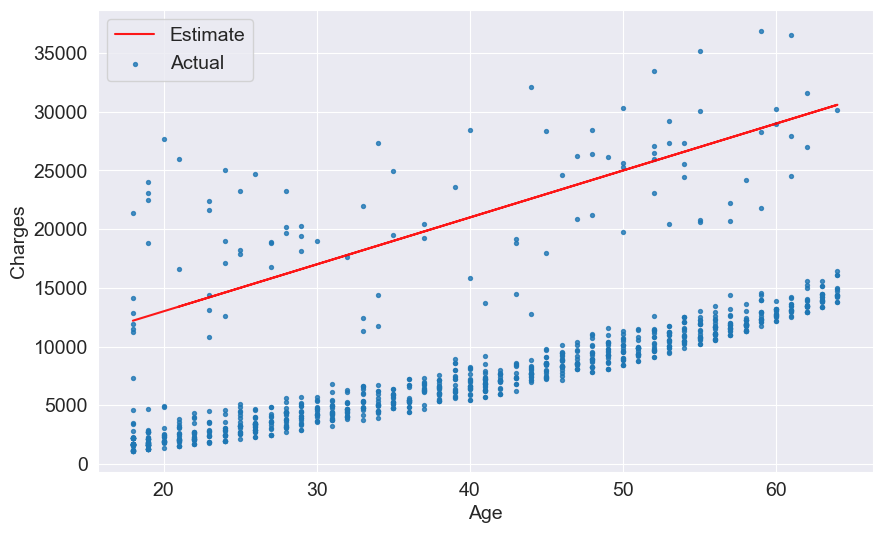

In [202]:
try_parameters(400,5000)

### Using Linear Regression Model Using Scikitlearn

In [209]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()

In [211]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [221]:
#X is a 2d array now we will provide imput and target
inputs = non_smokers_data[['age']]
target=  non_smokers_data.charges

In [225]:
model.fit(inputs,target)

LinearRegression()

In [231]:
# we can now make predictions using the model 
model.predict(np.array([[23] ,[37], [61]]))

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [233]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [237]:
model.coef_

array([267.24891283])

In [241]:
model.intercept_

-2091.420556565079

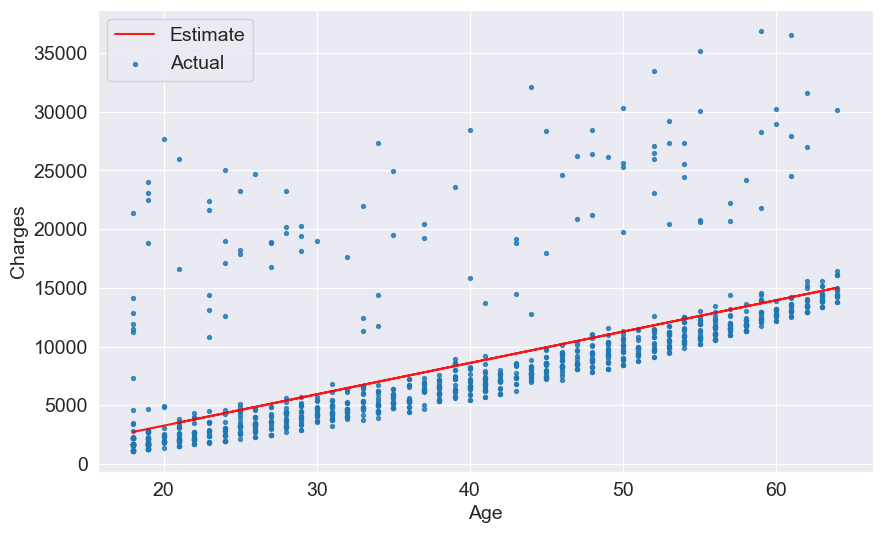

In [243]:
try_parameters(model.coef_,model.intercept_)
# The line is closer to thw points 
# it is slightly above the cluster points because of the outliers points in the data set

In [245]:
#function to predict the rmse value 
def rmse (target,predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [247]:
rmse(model.coef_,model.intercept_)
rmse(target, predictions)
#This is the loss computed by the initial model using the non_smoker data

4662.505766636395

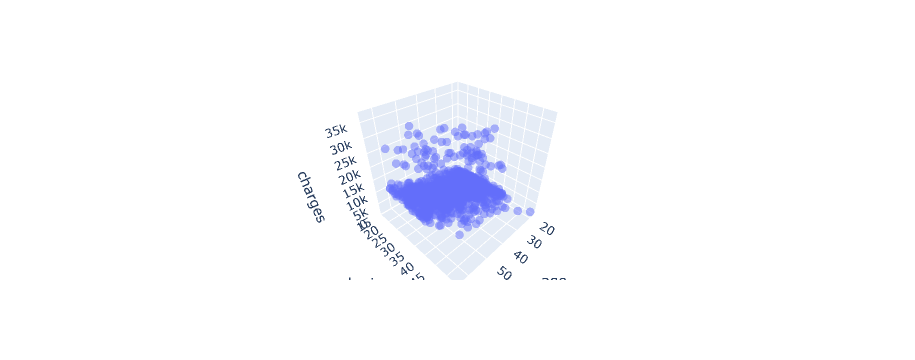

In [269]:
fig=px.scatter_3d(non_smokers_data,
                 x='age',
                 y='bmi',
                 z='charges')
fig.update_traces(marker_size=3,marker_opacity=0.5)
fig.show()

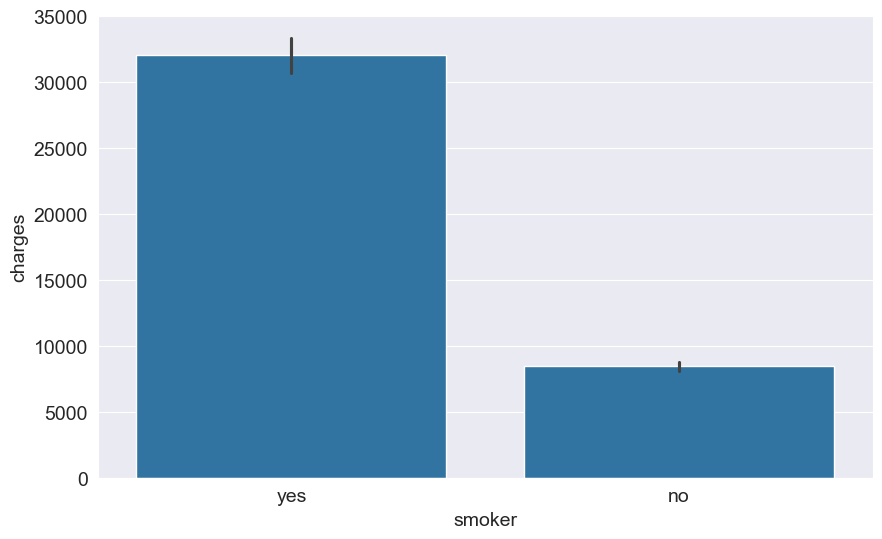

In [283]:
# Using categorical data
# converting categorical into dinary data 
sns.barplot(data=medical_data,
           x='smoker',
           y='charges')
plt.show()

In [293]:
smokers_codes={'no':0,'yes':1}
medical_data['smoker_code']=medical_data.smoker.map(smokers_codes)

In [307]:
inputs, targets = medical_data[['age', 'bmi', 'children', 'smoker_code']], medical_data['charges']
model=LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss=rmse(targets, predictions)
print('loss: ' , loss)

loss:  6056.439217188081


In [309]:
from sklearn import preprocessing 

In [313]:
enc=preprocessing.OneHotEncoder()
enc.fit(medical_data[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [317]:
one_hot=enc.transform(medical_data[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [327]:
medical_data[['northeast', 'northwest', 'southeast', 'southwest' ]] =one_hot
medical_data

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [331]:
sex_codes={'female':0,'male':1}
medical_data['sex_code']=medical_data.sex.map(sex_codes)

In [333]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets =medical_data[input_cols], medical_data['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [337]:
#Model Improvements
#1)feature scaling:determining importance of each feature
from sklearn.preprocessing import StandardScaler
numeric_cols  = ['age', 'bmi','children']
scaler = StandardScaler()
scaler.fit(medical_data[numeric_cols])

StandardScaler()

In [343]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [345]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [351]:
scaled_inputs = scaler.transform(medical_data[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [353]:
#combine with categorical data
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_data[cat_cols].values

In [355]:
#we put scaler data and numerical data together
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_data.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [357]:
#now comapre weights
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [359]:
#Create a test set
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [361]:
#create and train the model
model  = LinearRegression().fit(inputs_train, targets_train)
# generate predictions
predictions_test = model.predict(inputs_test)

#compute the loss
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6875.862054090649
